In [14]:
# https://www.geeksforgeeks.org/stock-price-prediction-project-using-tensorflow/
# https://algotrading101.com/learn/yahoo-finance-api-guide/
# https://www.projectpro.io/article/stock-price-prediction-using-machine-learning-project/571#:~:text=FAQs-,Which%20machine%20learning%20algorithm%20is%20best%20for%20stock%20price%20prediction,into%20a%20classical%20ANN%20regressor.
# https://colab.research.google.com/drive/11rGLUR_2VG1cE03u-EoQpXHx5Jz4Lzwr
# https://colab.research.google.com/drive/1po08kK-dqJsLsRVeD18YlKuTwJP0aLU1
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
# https://keras.io/examples/timeseries/timeseries_traffic_forecasting/
# https://wandb.ai/ayush-thakur/dl-question-bank/reports/LSTM-RNN-in-Keras-Examples-of-One-to-Many-Many-to-One-Many-to-Many---VmlldzoyMDIzOTM
# https://www.analyticsvidhya.com/blog/2022/11/analyzing-and-comparing-deep-learning-models/
# https://www.tensorflow.org/guide/keras/rnn?hl=tr
# https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/#:~:text=Keras%20can%20separate%20a%20portion,size%20of%20your%20training%20dataset.
# https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

try:
    import yahoo_fin.stock_info as si
except:
    !pip install yahoo_fin
    import yahoo_fin.stock_info as si

import tensorflow as tf
import datetime as dt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings

import pandas as pd
import requests

warnings.filterwarnings("ignore")

In [15]:
# name of the stock and time interval to forcast
stock_name  = "AAPL"
Start_Date = "2022-11-01"
End_Date = dt.datetime.now()

# Sets the global random seed.
tf.random.set_seed(0)

# download the data fromm yahoo fin
yf_data = si.get_data(stock_name, start_date= Start_Date, end_date= End_Date, index_as_date = True, interval = "1d")

# pre process
data_frame = pd.DataFrame(data=yf_data)
data_frame['close'].fillna(method='ffill')

# get close data
close_data_frame = data_frame.filter(['close'])
close_data = close_data_frame.values

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_data = scaler.fit_transform(close_data)

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(close_data) * .95 ))

# Create the training data set 
# Create the scaled training data set
train_data = scaled_close_data[0:int(training_data_len), :]

# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(n_lookback, len(train_data)):
    x_train.append(train_data[i-n_lookback:i, 0])
    y_train.append(train_data[i, 0])
    if i<= n_lookback+1:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.7567099 , 0.590783  , 0.40920821, 0.39444602, 0.41038899,
       0.42751319, 0.29081514, 0.64510776, 0.72866182, 0.68673725,
       0.73870001, 0.70179452, 0.75877682, 0.77560549, 0.67876554,
       0.7428334 , 0.76911054, 0.68171816, 0.56686832, 0.47681886,
       0.67935615, 0.68762295, 0.67286075, 0.6380222 , 0.52819145,
       0.47002838, 0.52051482, 0.50604816, 0.57484003, 0.6037738 ,
       0.53704885, 0.33894004, 0.28018635, 0.21700418, 0.21493771,
       0.30793934, 0.21287079, 0.20194691, 0.14791723, 0.030115  ,
       0.13551704, 0.14496461, 0.00147631, 0.03956279, 0.        ,
       0.13581212, 0.15146001, 0.16858421, 0.2500718 , 0.24770979,
       0.28756744, 0.32240645, 0.30085378, 0.30262517, 0.3793883 ,
       0.47504747, 0.51697204, 0.49719075, 0.55919214, 0.61735477])]
[0.5308485354826686]

[array([0.7567099 , 0.590783  , 0.40920821, 0.39444602, 0.41038899,
       0.42751319, 0.29081514, 0.64510776, 0.72866182, 0.68673725,
       0.73870001, 0.70179452, 0.758

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

32/32 [==============================] - 5s 34ms/step - loss: 0.0791


In [17]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_close_data[training_data_len - n_lookback: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = close_data[training_data_len:, :]
for i in range(n_lookback, len(test_data)):
    x_test.append(test_data[i-n_lookback:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 775ms/step


6.968135854906719

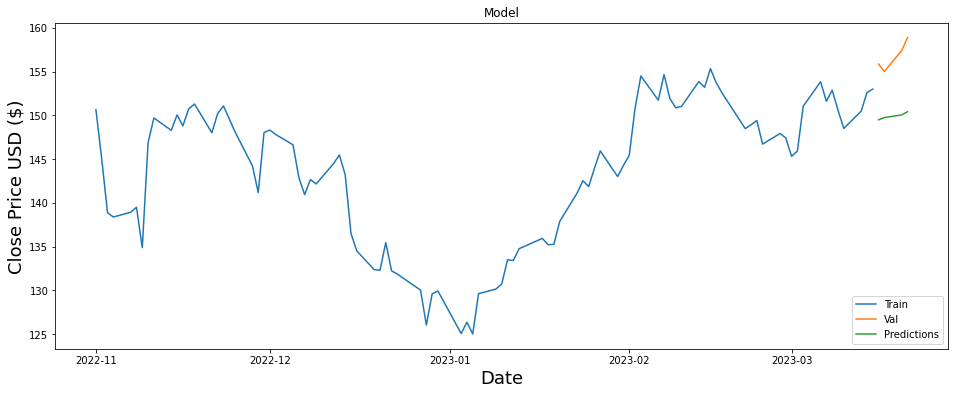

In [18]:
# Plot the data
train = close_data_frame[:training_data_len]
valid = close_data_frame[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
# Show the valid and predicted prices
valid

,close,Predictions
2023-03-16,155.850006,149.481537
2023-03-17,155.000000,149.744598
2023-03-20,157.399994,150.039917
2023-03-21,158.890305,150.412552


In [32]:
import json
chart_data = []
year = dt.datetime.now().year
start_date = dt.date(year, 1, 1)
end_date = dt.date(year+1, 1, 1)
temp = close_data_frame[start_date : end_date]
for d,v in temp.iterrows():
            dct ={}
            dct["date"] = d.strftime("%Y-%m-%d")
            dct["close"] = v.close
            chart_data.append(dct)

In [21]:
chart_data = []
for d,v in valid.Predictions.items():
            dct ={}
            dct["date"] = d.strftime("%Y-%m-%d")
            dct["close"] = v
            chart_data.append(dct)
         

In [22]:
# generate the forecasts
X_ = scaled_close_data[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

1/1 [==============================] - 0s 30ms/step


In [23]:
Y_.size

1

In [24]:
X_.size

60

In [25]:
df_past = data_frame[['close']].reset_index()
df_past.rename(columns={'index': 'Date', 'close': 'Actual'}, inplace=True)

df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]


df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title=stock_name)

ValueError: ignored